# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [46]:
from __future__ import print_function, division

import nsfg
from collections import defaultdict

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [30]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [31]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [21]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [14]:
used_preg = preg[['caseid', 'prglngth', 'prglngth', 'pregordr', 'pregordr', 'birthwgt_lb',  'birthwgt_oz',  'birthwgt_oz',  'birthwgt_oz']]

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [32]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [33]:
pregordr

0        1
1        2
2        1
3        2
4        3
5        1
6        2
7        3
8        1
9        2
10       1
11       1
12       2
13       3
14       1
15       2
16       3
17       1
18       2
19       1
20       2
21       1
22       2
23       1
24       2
25       3
26       1
27       1
28       2
29       3
        ..
13563    2
13564    3
13565    1
13566    1
13567    1
13568    2
13569    1
13570    2
13571    3
13572    4
13573    1
13574    2
13575    1
13576    1
13577    2
13578    1
13579    2
13580    1
13581    2
13582    3
13583    1
13584    2
13585    1
13586    2
13587    3
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [34]:
pregordr[0]

1

Select a slice from a column.

In [35]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [36]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [37]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [38]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

We have already seen two variables in the NSFG dataset, caseid and
pregordr, and we have seen that there are 244 variables in total. For the
explorations in this book, I use the following variables:
- caseid is the integer ID of the respondent.8 Chapter 1. Exploratory data analysis
- prglngth is the integer duration of the pregnancy in weeks.
- outcome is an integer code for the outcome of the pregnancy. The code
1 indicates a live birth.
-  pregordr is a pregnancy serial number; for example, the code for a
respondent’s first pregnancy is 1, for the second pregnancy is 2, and so
on.
 birthord is a serial number for live births; the code for a respondent’s
first child is 1, and so on. For outcomes other than live birth, this field
is blank.
- birthwgt_lb and birthwgt_oz contain the pounds and ounces parts
of the birth weight of the baby.
- agepreg is the mother’s age at the end of the pregnancy.
- finalwgt is the statistical weight associated with the respondent. It is
a floating-point value that indicates the number of people in the U.S.
population this respondent rep

In [42]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [66]:
def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d

In [67]:
caseid = 10229
preg_map = MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

In [88]:
preg.totalwgt

AttributeError: 'DataFrame' object has no attribute 'totalwgt'

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [75]:
preg.birthord.value_counts()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [89]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [103]:
# Solution goes here
count = preg[preg['prglngth'] <= 13].shape[0]
print(f'0 - 13: {count}')
count = preg[(preg['prglngth'] <= 26) & (preg['prglngth'] >= 14) ].shape[0]
print(f'14 - 26: {count}')
count = preg[(preg['prglngth'] <= 50) & (preg['prglngth'] >= 27) ].shape[0]
print(f'27 - 50: {count}')

0 - 13: 3522
14 - 26: 793
27 - 50: 9278


To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [104]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [106]:
# Solution goes here
preg['totalwgt_kg'] = preg.totalwgt_lb*0.453592
preg['totalwgt_kg'] 

0        3.997279
1        3.572037
2        4.139027
3        3.175144
4        2.806601
5        3.883881
6        4.337473
7        3.798833
8        3.430289
9        3.005047
10       3.543687
11       3.175144
12       1.814368
13            NaN
14            NaN
15       3.486988
16       3.401940
17       2.863300
18            NaN
19       3.968930
20       3.713785
21       2.523105
22            NaN
23       3.061746
24       3.345241
25       3.090095
26       3.685435
27       3.231843
28       2.749901
29       3.373591
           ...   
13563    3.486988
13564    3.458639
13565    3.685435
13566    3.401940
13567         NaN
13568         NaN
13569    2.636503
13570    3.033396
13571    2.721552
13572    2.636503
13573    2.976697
13574    2.778251
13575         NaN
13576    2.919999
13577         NaN
13578    2.721552
13579    3.175144
13580         NaN
13581    2.891649
13582         NaN
13583         NaN
13584    2.891649
13585         NaN
13586         NaN
13587     

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [107]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [109]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [110]:
# Solution goes here
resp.age_r.value_counts()

30    292
22    287
23    282
31    278
32    273
37    271
24    269
21    267
25    267
36    266
35    262
29    262
26    260
20    258
33    257
38    256
40    256
34    255
27    255
43    253
28    252
41    250
19    241
44    235
18    235
17    234
16    223
15    217
39    215
42    215
Name: age_r, dtype: int64

(array([674., 734., 836., 796., 769., 843., 774., 793., 721., 703.]),
 array([15. , 17.9, 20.8, 23.7, 26.6, 29.5, 32.4, 35.3, 38.2, 41.1, 44. ]),
 <a list of 10 Patch objects>)

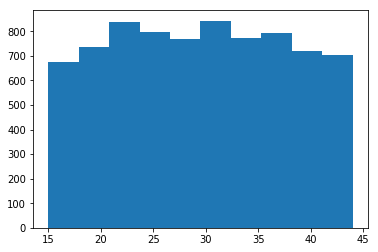

In [111]:
import matplotlib.pyplot as plt
plt.hist(resp.age_r)

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [112]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [113]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [117]:
# Solution goes here
resp[resp.caseid==2298]['age_r']

0    27
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [119]:
# Solution goes here
preg[preg.caseid==2298]['prglngth']

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [25]:
# Solution goes here

In [121]:
preg[(preg.caseid==2298) & (preg.pregordr == 1)]['totalwgt_kg']

2610    3.118445
Name: totalwgt_kg, dtype: float64

In [131]:
np.random.normal(0,1,7)

array([-1.37354773,  0.66535675,  0.74339371, -0.14294099,  0.38787925,
       -0.88230206,  0.55968835])

In [125]:
a = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

In [122]:
np.linalg.matrix_rank(np.random.randn(100))

1

In [128]:
a = np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -2.138])

In [129]:
a.mean()

0.15516666666666667

In [177]:
def RMSE(estimates,actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.sum(e2)/len(estimates)
    return np.sqrt(mse)

In [182]:
def estimate_1(n=7,m=1000):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        amostra = np.random.normal(mu,sigma,n)
        means.append(np.mean(amostra))
        medians.append(np.median(amostra))
        
    print(f'Mean RMSE: {RMSE(means,mu)}')
    print(f'Median RMSE: {RMSE(medians,mu)}')

In [181]:
estimate_1()

Mean RMSE: 0.3679302380700579
Median RMSE: 0.458905218707548


In [172]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [173]:
Estimate1()

rmse xbar 0.3943148938005049
rmse median 0.4679203164044181


In [184]:
def simulate_sample(mu=90, sigma=7.5, n=9, m=1000):
    means = []
    for _ in range(m):
        amostra = np.random.normal(mu, sigma, n)
        means.append(np.mean(amostra))
    return means

In [187]:
import seaborn as sns

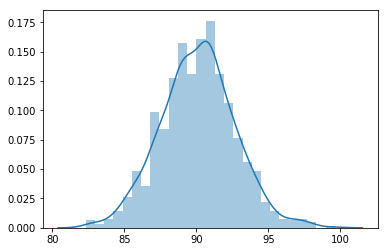

In [188]:
sns.distplot(simulate_sample(),)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.002, 0.002, 0.002, 0.004, 0.004, 0.004, 0.006, 0.006, 0.006,
        0.008, 0.013, 0.013, 0.015, 0.022, 0.025, 0.032, 0.036, 0.044,
        0.048, 0.051, 0.059, 0.066, 0.075, 0.083, 0.09 , 0.096, 0.104,
        0.113, 0.117, 0.13 , 0.139, 0.156, 0.17 , 0.193, 0.204, 0.213,
        0.226, 0.243, 0.269, 0.289, 0.31 , 0.325, 0.349, 0.37 , 0.393,
        0.418, 0.434, 0.452, 0.484, 0.502, 0.515, 0.54 , 0.557, 0.571,
        0.59 , 0.615, 0.641, 0.664, 0.683, 0.702, 0.722, 0.741, 0.758,
        0.778, 0.792, 0.808, 0.825, 0.839, 0.852, 0.863, 0.877, 0.894,
        0.904, 0.915, 0.925, 0.936, 0.944, 0.955, 0.958, 0.964, 0.97 ,
        0.976, 0.977, 0.98 , 0.982, 0.984, 0.987, 0.989, 0.99 , 0.99 ,
        0.991, 0.994, 0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999,
        1.   ]),
 array([82.81483845, 82.95929525, 83.10375204, 83.24820884, 83.39266563,
        83.53712243, 83.68157923, 83.82603602, 83.97049282, 84.11494962,
        84.25940641, 84.40386321, 84.54832   , 84.692776

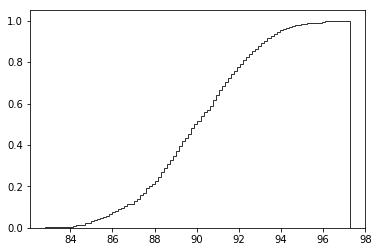

In [190]:
plt.hist(simulate_sample(), normed=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k',bins=100)

In [191]:
samples_mean = simulate_sample()

In [192]:
np.percentile(samples_mean,5)

86.0542254485094

In [193]:
np.percentile(samples_mean,95)

93.96915488005845

In [218]:
np.random.choice(list('HT'))

'H'

In [195]:
import random

In [196]:
random.choice('HT')

'H'